<a href="https://colab.research.google.com/github/Sri-0105/Titanic-survival-Prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC SURVIVAL PREDICTION:

## 1. Importing Packages





In [97]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

## 2. **Feeding** the data

In [98]:
df=pd.read_csv('/content/Titanic-Dataset.csv')

## 2. **Getting Insights** From the data

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

## Handling Missing Values

In [102]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [103]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df=df.dropna(subset=['Embarked'])
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## One-Hot Ecoding

In [104]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,G6,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,G6,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,G6,S


# Training The Model



## Splitting The Dataset

In [105]:
y=df['Survived']
x=df.drop(['Survived'],axis=1)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=100)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 11), (178, 11), (711,), (178,))

In [106]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

In [107]:
x_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
777,778,3,1,5.000000,0,0,12.475,False,False,False,...,False,False,False,False,False,False,True,False,False,True
782,783,1,0,29.000000,0,0,30.000,False,False,False,...,False,False,False,False,False,False,False,False,False,True
708,709,1,1,22.000000,0,0,151.550,False,False,False,...,False,False,False,False,False,False,False,False,False,True
153,154,3,0,40.500000,0,2,14.500,False,False,False,...,False,False,False,False,False,False,True,False,False,True
563,564,3,0,29.699118,0,0,8.050,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [108]:
x_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,"Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Name_Andersson, Miss. Ellis Anna Maria","Name_Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)",...,Cabin_E101,Cabin_E24,Cabin_E36,Cabin_E44,Cabin_E58,Cabin_E63,Cabin_E77,Cabin_G6,Embarked_Q,Embarked_S
639,640,3,0,29.699118,1,0,16.1000,False,False,False,...,False,False,False,False,False,False,False,True,False,True
147,148,3,1,9.000000,2,2,34.3750,False,False,False,...,False,False,False,False,False,False,False,True,False,True
278,279,3,0,7.000000,4,1,29.1250,False,False,False,...,False,False,False,False,False,False,False,True,True,False
484,485,1,0,25.000000,1,0,91.0792,False,False,False,...,False,False,False,False,False,False,False,False,False,False
770,771,3,0,24.000000,0,0,9.5000,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [122]:
missing_cols = set(x_train.columns) - set(x_test.columns)
for c in missing_cols:
    x_test[c] = 0

x_test = x_test[x_train.columns]

## Model Selection and Training

In [110]:
from sklearn.linear_model import LinearRegression
combined_data = pd.concat([x_train, x_test], axis=0)

combined_data = pd.get_dummies(combined_data, drop_first=True)

x_train = combined_data.iloc[:x_train.shape[0], :]
x_test = combined_data.iloc[x_train.shape[0]:, :]

lr = LinearRegression()
lr.fit(x_train, y_train)

y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [111]:
y_lr_train_pred

array([ 1.00000000e+00,  1.42552636e-13,  1.00000000e+00, -3.08642001e-14,
       -9.09272657e-14,  1.00000000e+00, -1.23789867e-13,  1.00000000e+00,
        1.56730184e-12,  1.00000000e+00,  1.00000000e+00, -2.42317277e-12,
       -1.66200387e-12,  8.87290241e-13, -2.20468088e-12,  1.00000000e+00,
        1.00000000e+00, -5.19140286e-13, -1.39999123e-13,  1.28785871e-14,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  4.71844785e-13,
       -7.27085059e-13, -2.72004641e-13,  5.30686606e-14,  1.00000000e+00,
        1.00000000e+00, -5.29909450e-13, -3.90243393e-13,  1.00000000e+00,
        2.31592523e-13,  1.00000000e+00,  6.14508444e-13, -1.61870517e-13,
        1.00000000e+00,  1.18050014e-12,  4.78839191e-13,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.97619698e-14,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  2.17159624e-13,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00, -

In [112]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

In [113]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  4.763616594140152e-25
LR R2 (Train):  1.0
LR MSE (Test):  0.12389638199351757
LR R2 (Test):  0.46196094201170357


In [114]:
lr_results=pd.DataFrame(['Linear Regression', lr_train_mse ,lr_train_r2 ,lr_test_mse ,lr_test_r2]).transpose()
lr_results.columns=['Model','Training MSE','Training R2','Testing MSE','Testing R2']
lr_results

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,0.0,1.0,0.123896,0.461961


## Testing Accuracy of the Model

In [115]:
from sklearn.metrics import accuracy_score
y_pred_binary = [1 if i>=0.5 else 0 for i in y_lr_test_pred]
accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy*100)

Accuracy: 85.95505617977528


# Predictions

In [116]:
max_prob_index = np.argmax(y_lr_test_pred)
max_prob_passenger = x_test.iloc[max_prob_index]

print("Passenger with Highest Chance of Dying:")
print(max_prob_passenger)
print("Predicted Survival Probability:",y_lr_test_pred[max_prob_index])

Passenger with Highest Chance of Dying:
PassengerId         782
Pclass                1
Sex                   1
Age                17.0
SibSp                 1
                  ...  
Cabin_E10_True    False
Cabin_E36_True    False
Cabin_E58_True    False
Cabin_E63_True    False
Cabin_E77_True    False
Name: 781, Length: 1719, dtype: object
Predicted Survival Probability: 1.36993653682048


In [117]:
min_prob_index = y_lr_test_pred.argmin()
min_prob_passenger = x_test.iloc[min_prob_index]  # Get passenger details

print("Passenger with the highest chance of Dying:")
print(max_prob_passenger)
print("Predicted survival probability:", y_lr_test_pred[max_prob_index])

Passenger with the highest chance of Dying:
PassengerId         782
Pclass                1
Sex                   1
Age                17.0
SibSp                 1
                  ...  
Cabin_E10_True    False
Cabin_E36_True    False
Cabin_E58_True    False
Cabin_E63_True    False
Cabin_E77_True    False
Name: 781, Length: 1719, dtype: object
Predicted survival probability: 1.36993653682048


# Data Visualisation

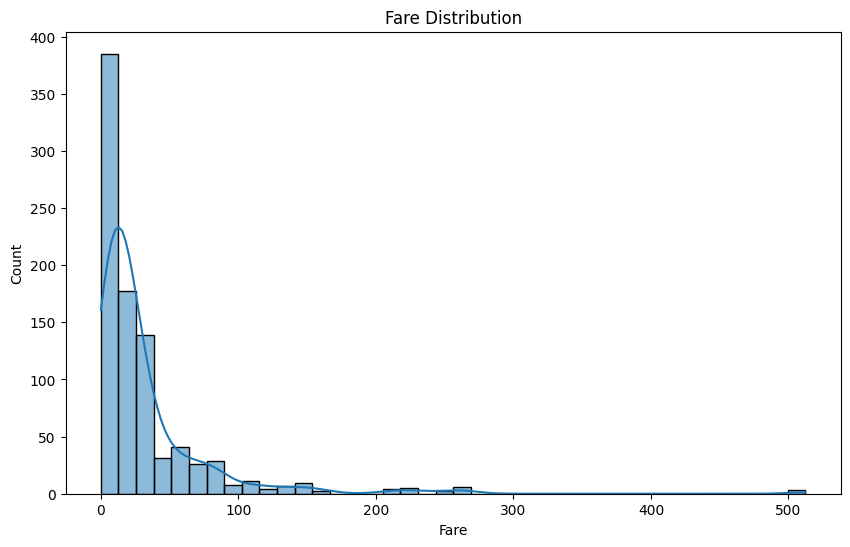

<ipython-input-118-81bae2bc2e20>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')


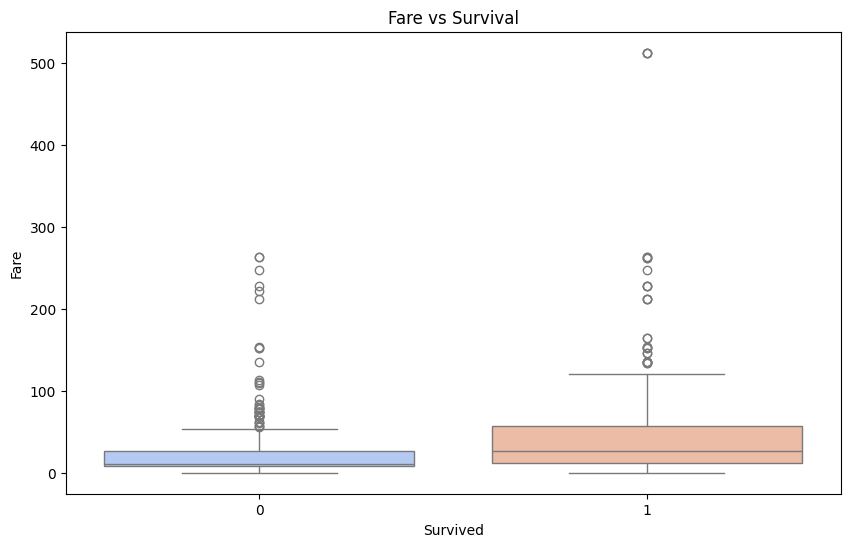

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

# Fare vs Survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='coolwarm')
plt.title('Fare vs Survival')
plt.show()

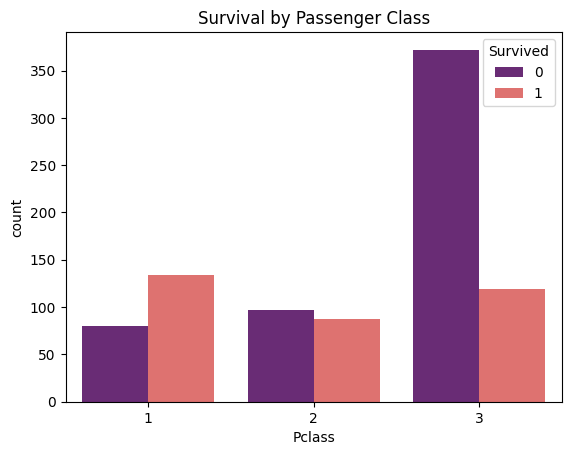

In [119]:
sns.countplot(x='Pclass', hue='Survived', data=df, palette='magma')
plt.title('Survival by Passenger Class')
plt.show()

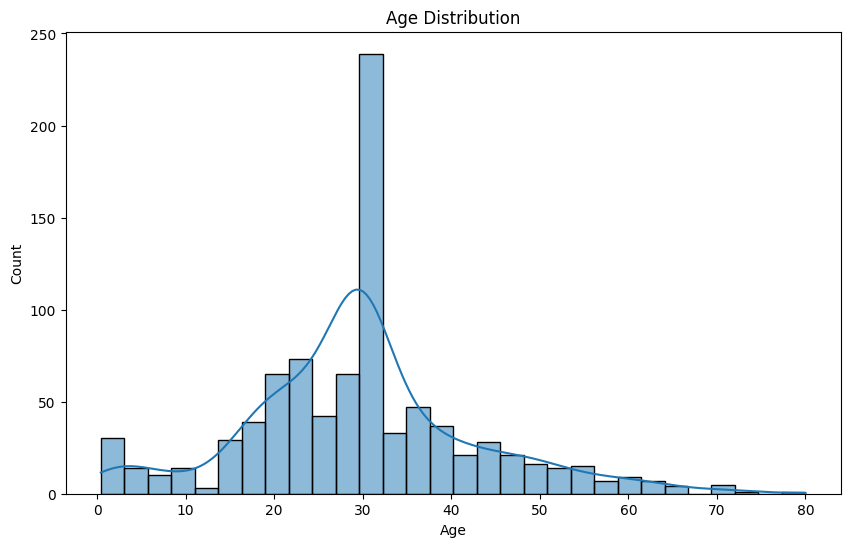

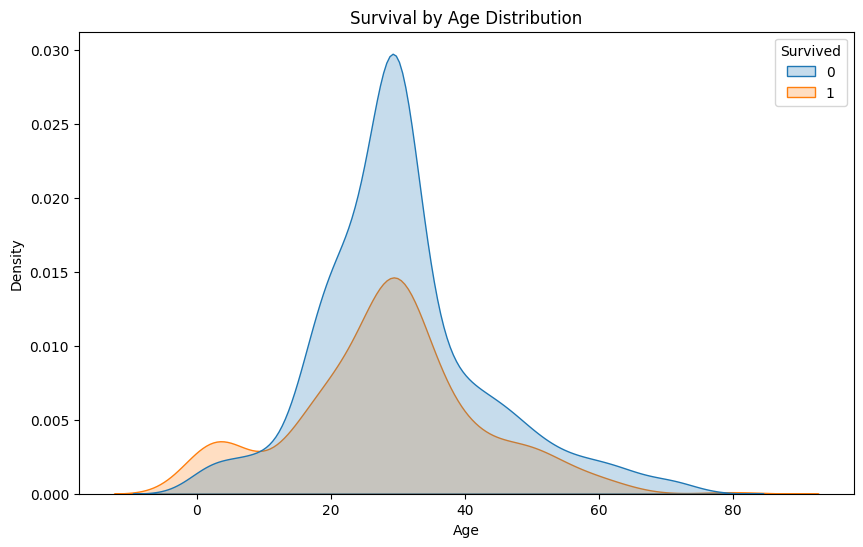

In [120]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Survival by Age
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()

<ipython-input-121-2c16de2fa017>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


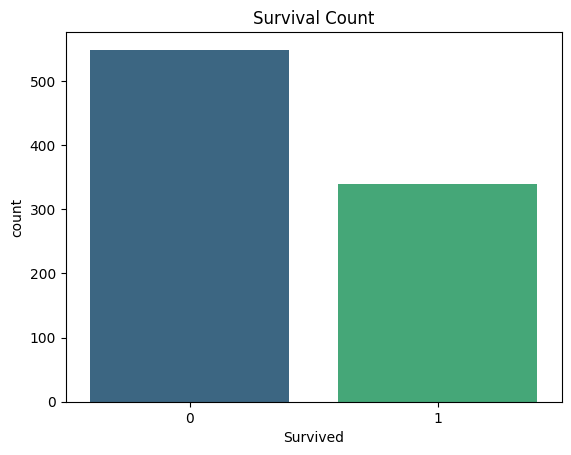

In [121]:
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')
plt.show()